In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
!gdown 1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
!gdown 1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB
!gdown 1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h

Downloading...
From: https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
To: /content/train_data.csv
100% 635M/635M [00:05<00:00, 115MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB
To: /content/test_data.csv
100% 15.6M/15.6M [00:00<00:00, 166MB/s]
Downloading...
From: https://drive.google.com/uc?id=1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h
To: /content/title_brand.csv
100% 97.3M/97.3M [00:00<00:00, 229MB/s]


In [3]:
# Load data
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
map = pd.read_csv('title_brand.csv')

<ipython-input-3-18313e1777d3>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train_data.csv')


In [4]:
train.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [5]:
map.head()

,asin,title,brand
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.
2,0060009810,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page
4,0060786817,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page


In [6]:
train.describe()

,overall,unixReviewTime
count,838944.000000,8.389440e+05
mean,4.021317,1.483167e+09
std,1.344223,2.229270e+07
min,1.000000,1.451606e+09
25%,3.000000,1.464653e+09
50%,5.000000,1.479254e+09
75%,5.000000,1.499472e+09
max,5.000000,1.538525e+09


In [7]:
map.describe()

,asin,title,brand
count,786445,786426,781007
unique,756077,742018,59108
top,B0001YXWWS,"iPhone Charger, MFi Certified Lightning Cable,...",Sony
freq,2,884,12310


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838742 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838869 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


In [9]:
map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786445 entries, 0 to 786444
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   asin    786445 non-null  object
 1   title   786426 non-null  object
 2   brand   781007 non-null  object
dtypes: object(3)
memory usage: 18.0+ MB


In [10]:
print(train.isnull().sum()/len(train)*100)

overall            0.000000
vote              77.177499
verified           0.000000
reviewTime         0.000000
reviewerID         0.000000
asin               0.000000
style             41.520173
reviewerName       0.024078
reviewText         0.000000
summary            0.008940
unixReviewTime     0.000000
dtype: float64


In [11]:
print(map.isnull().sum()/len(map)*100)

asin     0.000000
title    0.002416
brand    0.691466
dtype: float64


# Part 1:

### 1. Distribution of "overal" Column

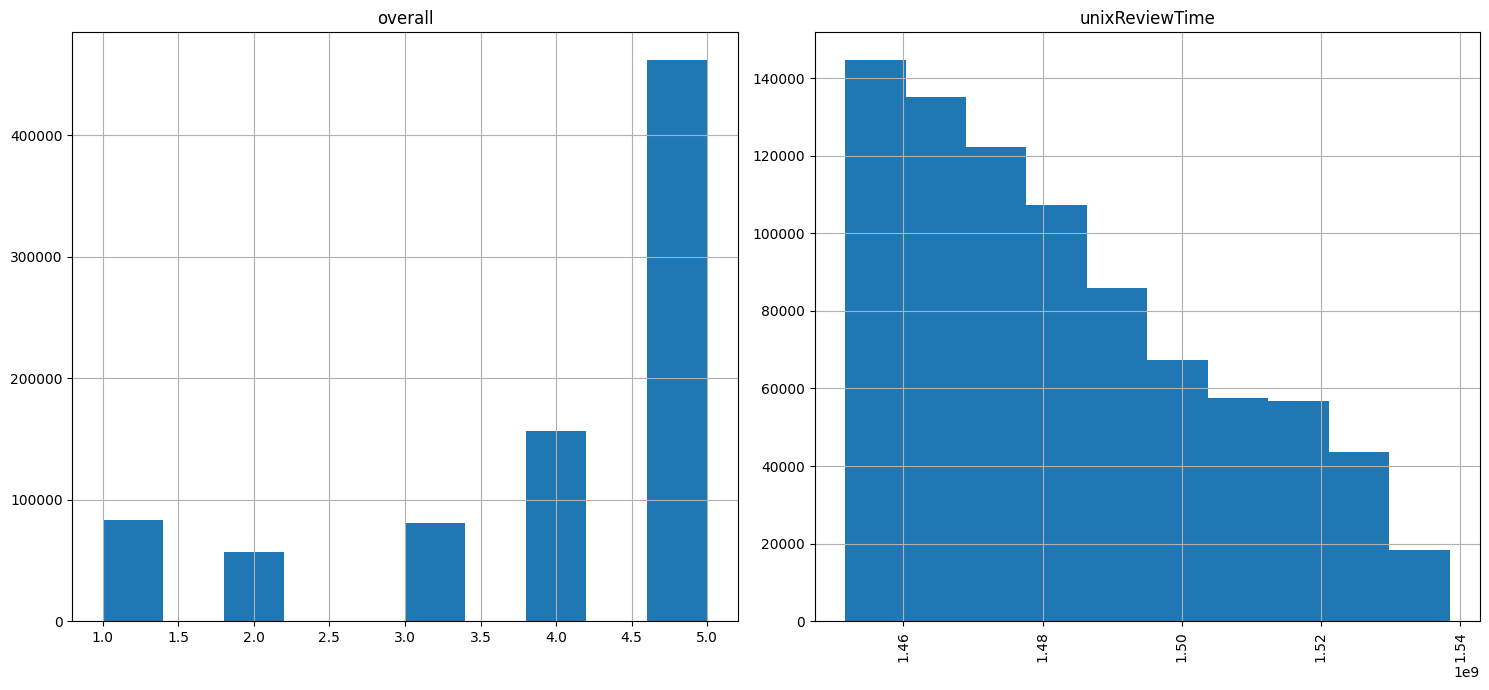

In [12]:
import matplotlib.pyplot as plt

# Plot distributions
train.hist(bins=10, figsize=(15,7))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

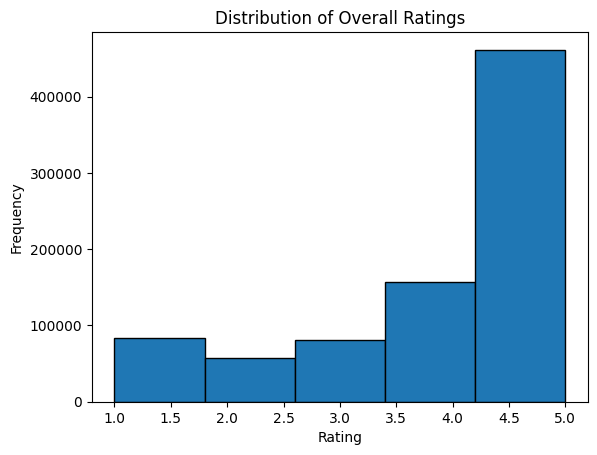

In [13]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'overall' column
plt.hist(train['overall'], bins=5, edgecolor='black')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

poe

### 2. Word Cloud

In [14]:
# Creating word clouds for positive, negative and neutral comments

# Data separation
pos_reviews = train[train['overall']>=4]['reviewText']
neu_reviews = train[train['overall']==3]['reviewText']
neg_reviews = train[train['overall']<=2]['reviewText']

In [15]:
# Remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


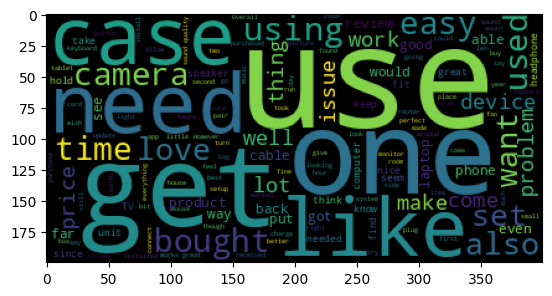

In [24]:
# Creating word clouds
from wordcloud import WordCloud

wc_pos = WordCloud(width=400, height=200, stopwords=stop).generate(" ".join(pos_reviews))
plt.imshow(wc_pos)

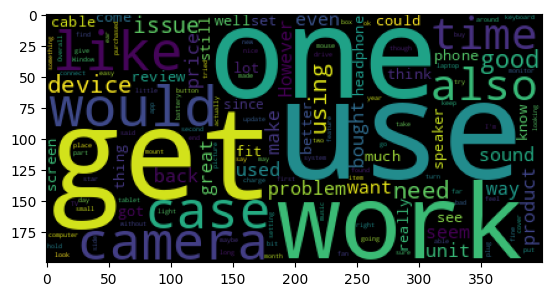

In [22]:
wc_neu = WordCloud(width=400, height=200, stopwords=stop).generate(" ".join(neu_reviews))
plt.imshow(wc_neu)

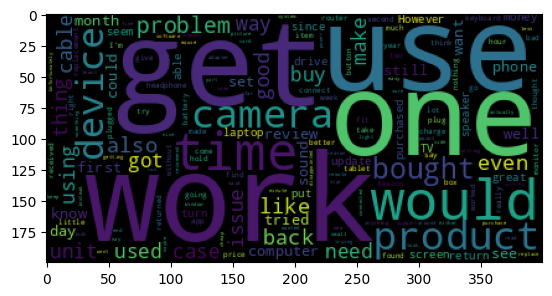

In [23]:
wc_neg = WordCloud(width=400, height=200, stopwords=stop).generate(" ".join(neg_reviews))
plt.imshow(wc_neg)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


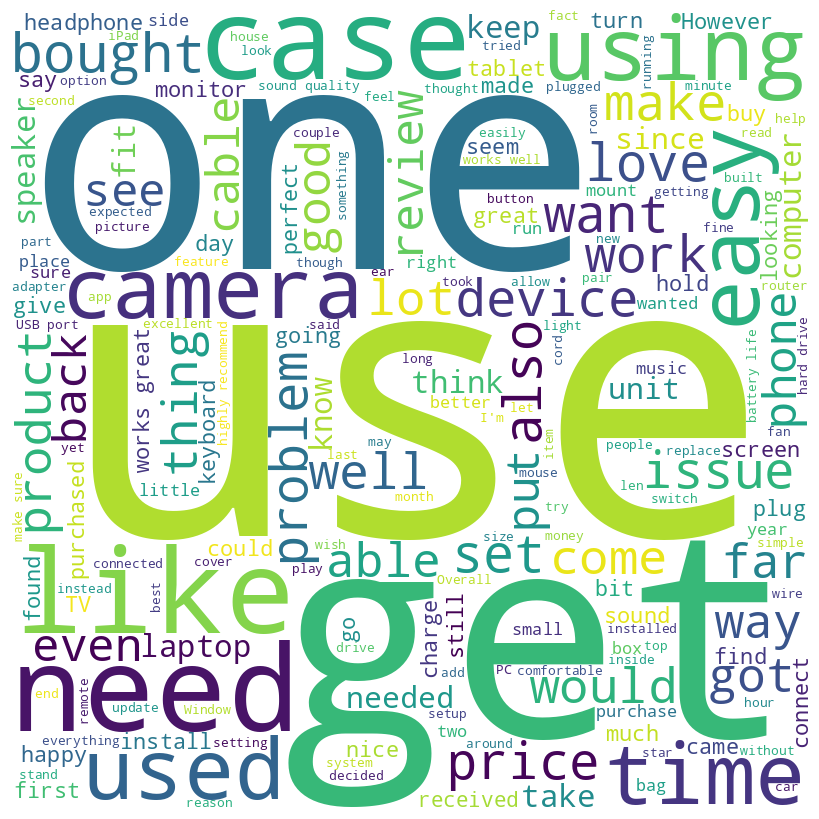

In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from wordcloud import WordCloud

positive_reviews = train[train['overall'] > 3]['reviewText']
negative_reviews = train[train['overall'] < 3]['reviewText']
neutral_reviews = train[train['overall'] == 3]['reviewText']

positive_words = ' '.join(positive_reviews)
negative_words = ' '.join(negative_reviews)
neutral_words = ' '.join(neutral_reviews)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop,
                min_font_size = 10).generate(positive_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### add stem

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess(text):
    # Convert to lower case
    text = text.lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stop words and stem the words
    words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]
    # Join the words back into a string
    text = ' '.join(words)
    return text

# Apply the preprocessing to the review text
train['reviewText'] = train['reviewText'].apply(preprocess)

### use word cloud with Function

In [35]:
# Function to create word cloud
def wordcloud(train, category):
    # Select comments with the desired category
    reviews = train[train["overall"] == category]

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    reviews["text"] = reviews["text"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

    # Creating word clouds
    wordcloud = WordCloud(max_words=100, background_color="white").generate(" ".join(reviews["text"]))

    return wordcloud

In [ ]:
# Creating word clouds for positive, negative and neutral categories
positive_cloud = wordcloud(train, 4)
negative_cloud = wordcloud(train, 1)
neutral_cloud = wordcloud(train, 3)

In [ ]:
#  Show word clouds
plt.subplot(1, 3, 1)
plt.imshow(positive_cloud)
plt.axis("off")
plt.title("Most frequent words in positive comments")

plt.subplot(1, 3, 2)
plt.imshow(negative_cloud)
plt.axis("off")
plt.title("Most frequent words in negative comments")

plt.subplot(1, 3, 3)
plt.imshow(neutral_cloud)
plt.axis("off")
plt.title("Most frequent words in neutral comments")

plt.show()

In [ ]:
# Comparison of frequent words in positive and negative categories
positive_words = positive_cloud.words_
negative_words = negative_cloud.words_

# Words Intersection
intersection = set(positive_words) & set(negative_words)
print(intersection)

### 3. top-10 best Votes

In [ ]:
# Check the subscription of words and their interpretation
# Find the 10 people with the most helpful votes
top_users = train.groupby('reviewerID')['vote'].sum().sort_values(ascending=False).head(10)
print(top_users)

In [ ]:
top_reviewers = train.sort_values('vote', ascending=False).head(10)
print(top_reviewers[['reviewerName', 'vote']])

### 4. Plot Histogram of text Length

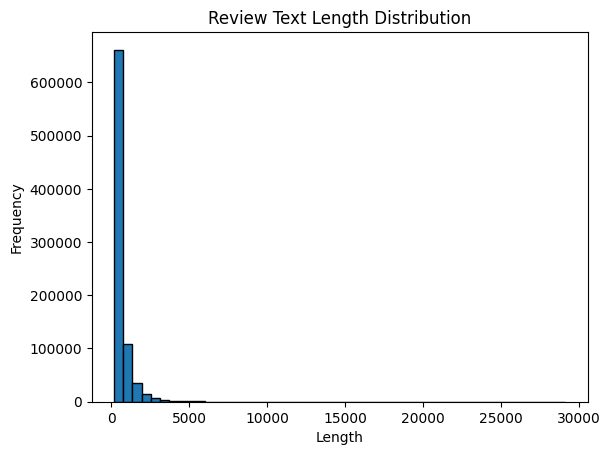

In [38]:
review_lengths = train['reviewText'].apply(len)
plt.hist(review_lengths, bins=50, edgecolor='black')
plt.title('Review Text Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()
# Suggested range: 100 to 500 characters

### 5. top-10 5-star products

In [ ]:
# Find 10 products with the highest score(5)
top10 = train[train['overall']==5].groupby('brand')['overall'].count().sort_values(ascending=False).head(10)
print(top10)

In [32]:
top_products = train[train['overall'] == 5]['asin'].value_counts().head(10)
print(top_products)

B010OYASRG    1163
B00L0YLRUW     659
B01DA0YCNC     600
B000VS4HDM     598
B0043T7FXE     552
B00OBRE5UE     529
B00S9SGNNS     471
B000WYVBR0     448
B00P7EVST6     433
B00OAJ412U     431
Name: asin, dtype: int64


### 6. top-10 vote of brands

In [ ]:
# Calculate the average score for the top 10 brands
top_brands = train.groupby('brand')['overall'].count().sort_values(ascending=False).head(10).index
brand_avg = train[train['brand'].isin(top_brands)].groupby('brand')['overall'].mean().sort_values(ascending=False)
print(brand_avg)

In [ ]:
# First, we find 10 brands with the highest number of comments
top_brands = train['brand'].value_counts().head(10).index

# Then for each brand, we calculate the average scores
brand_scores = {}
for brand in top_brands:
    brand_scores[brand] = train[train['brand'] == brand]['overall'].mean()

# We put the results in a DataFrame and sort them based on the average score
brand_scores_df = pd.DataFrame.from_dict(brand_scores, orient='index', columns=['average_score'])
brand_scores_df.sort_values('average_score', ascending=False, inplace=True)

print(brand_scores_df)